In [1]:
#xml包里进行解析的方法
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import jieba
#scipy中处理图像的函数
from scipy.misc import imread
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row',None)

In [2]:
data = pd.read_csv('data_result.csv')

In [4]:
data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [7]:
len(data['ability'])

4193

In [83]:
data_mac_ability = data[data['brand'].str.contains('MAC')]['ability']

In [84]:
data_mac_ability = data_mac_ability.apply(lambda x : x.replace('\xa0',' '))

In [85]:
data_mac_ability = data_mac_ability.reset_index()

In [86]:
data_mac_ability['ability']

0                 不易脱色 持久 自然立体
1                           滋润
2                        持久不掉色
3                           滋润
4                         不易脱色
5       不易脱色 提升气色 易上色 自然立体 持久不
6                           滋润
7                           滋润
8                            无
9                 不易脱色 持久 自然立体
10                        提升气色
11                        提升气色
12                不易脱色 持久 自然立体
13                不易脱色 提升气色 保湿
14                          滋润
15                           无
16               不易脱色 持久 滋润 保湿
17                不易脱色 持久 自然立体
18            不易脱色 持久 提升气色 易上色
19                          滋润
20                 持久 提升气色 易上色
21                    不易脱色 不粘杯
22           不易脱色 持久 易上色 滋润 保湿
23              持久 提升气色 易上色 遮瑕
24                不易脱色 持久 自然立体
25            不易脱色 持久 提升气色 易上色
26                          滋润
27                不易脱色 持久 自然立体
28              易上色 不易脱色 滋润 保湿
29                          滋润
30                          滋润
31                          滋润
32      

In [87]:
s = ''
for i in range(len(data_mac_ability)):
    s = s + data_mac_ability['ability'][i]

In [88]:
s

' 不易脱色 持久 自然立体 滋润 持久不掉色 滋润 不易脱色 不易脱色 提升气色 易上色 自然立体 持久不 滋润 滋润无 不易脱色 持久 自然立体 提升气色 提升气色 不易脱色 持久 自然立体 不易脱色 提升气色 保湿 滋润无 不易脱色 持久 滋润 保湿 不易脱色 持久 自然立体 不易脱色 持久 提升气色 易上色 滋润 持久 提升气色 易上色 不易脱色 不粘杯 不易脱色 持久 易上色 滋润 保湿 持久 提升气色 易上色 遮瑕 不易脱色 持久 自然立体 不易脱色 持久 提升气色 易上色 滋润 不易脱色 持久 自然立体 易上色 不易脱色 滋润 保湿 滋润 滋润 滋润 不易脱色 持久 提升气色 易上色 滋润 保湿 不易脱色 提升气色 易上色 不易脱色 持久 自然立体 易上色 不易脱色 持久 提升气色 易上色 不易脱色 持久 提升气色 易上色 滋润 不易脱色 持久 不易脱色 持久 自然立体 滋润 不易脱色 持久 提升气色 易上色 提升气色 不易脱色 持久 滋润 持久不掉色 滋润 不易脱色 持久 自然立体 滋润 滋润 提升气色 易上色 滋润 保湿 滋润 不易脱色 持久 自然立体 不易脱色 持久 自然立体 不易脱色 持久 自然立体 不易脱色 持久 自然立体 滋润 持久 易上色 提升气色 提升气色 保湿 不易脱色 持久 自然立体 不易脱色 持久 提升气色 易上色 不易脱色 持久 提升气色 易上色 滋润 不易脱色 持久 提升气色 易上色 提升气色 不易脱色 持久 自然立体 不易脱色 持久 自然立体  不易脱色 持久 自然立体  不易脱色 持久 提升气色 易上色  不易脱色 持久 提升气色 易上色  提升气色 易上色 滋润  不易脱色 持久 提升气色 易上色  持久 提升气色  不易脱色 持久 提升气色 易上色  提升气色  滋润  滋润  滋润  不易脱色 持久 自然立体  易上色 不易脱色 滋润 保湿  易上色 不易脱色 滋润 保湿  滋润  不易脱色 持久 自然立体  不易脱色 持久 自然立体  不易脱色 持久 自然立体  提升气色  不易脱色 持久 自然立体  滋润  不易脱色 持久 提升气色 易上色  易上色 自然立体  不易脱色 持久 自然立体  滋润  不易脱色 持久 提升气色 易上色  不易脱色 持久 自然立体  滋润  不易脱色 持久 自然立体  持久 提升气色 

In [89]:
#设置背景图片以及字体
back_color = imread('bg_img.png')
font = 'Tensentype-DouDouJ.ttf'

In [90]:
# 获取WordCloud对象
wc = WordCloud(background_color='white',
              max_words=1000,
              mask=back_color,
              font_path = font,
              random_state = 15 )

In [91]:
# jieba分词，形成有空格的字符串
wc.generate(s)

In [92]:
#获取背景图片的色彩
image_colors = ImageColorGenerator(back_color)

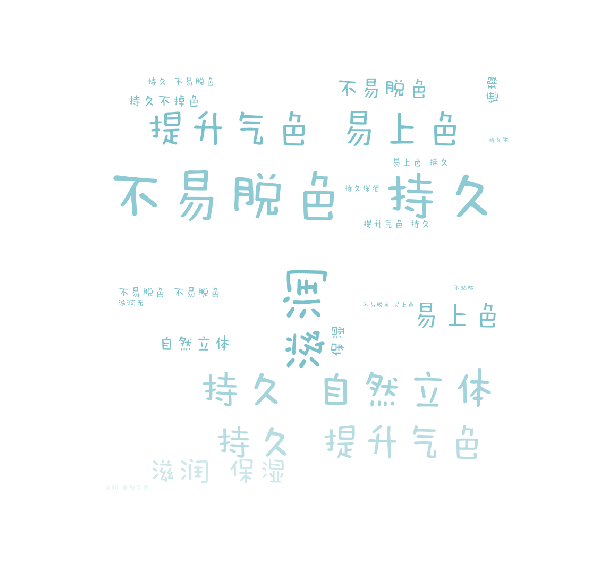

In [93]:
#以背景图片的主色彩来做字体颜色
plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()